In [1]:
%matplotlib inline
from pycocotools.coco import COCO
from pycocoevalcap.eval import COCOEvalCap
import matplotlib.pyplot as plt
import skimage.io as io
import pylab
pylab.rcParams['figure.figsize'] = (5.0, 4.0)

import json
from json import encoder
encoder.FLOAT_REPR = lambda o: format(o, '.3f')

In [2]:
# set up file names and pathes
dataDir='.'
dataType='val2014'
algName = 'fakecap'
annFile='%s/annotations/captions_%s.json'%(dataDir,dataType)
subtypes=['results', 'evalImgs', 'eval']
[resFile, evalImgsFile, evalFile]= \
['%s/results/captions_%s_%s_%s.json'%(dataDir,dataType,algName,subtype) for subtype in subtypes]

print annFile
print resFile
print evalImgsFile
print evalFile

./annotations/captions_val2014.json
./results/captions_val2014_fakecap_results.json
./results/captions_val2014_fakecap_evalImgs.json
./results/captions_val2014_fakecap_eval.json


In [8]:
'''test'''
import json
with open('./results/captions_val2014_fakecap_results.json') as res_data:    
    data_res = json.load(res_data)

print type(data_res)
print data_res[:5]

with open('./annotations/captions_val2014.json') as ann_data:    
    data_ann = json.load(ann_data)

print type(data_ann)
print data_ann.keys()
# print data_ann['annotations']
print data_ann['type']

<type 'list'>
[{u'image_id': 404464, u'caption': u'black and white photo of a man standing in front of a building'}, {u'image_id': 380932, u'caption': u'group of people are on the side of a snowy field'}, {u'image_id': 565778, u'caption': u'train traveling down a train station'}, {u'image_id': 431573, u'caption': u'red fire hydrant sitting on a park bench in front of a road'}, {u'image_id': 322226, u'caption': u'black and white cat is sitting on top of a wooden bench'}]
<type 'dict'>
[u'info', u'images', u'licenses', u'type', u'annotations']
captions


In [4]:
# create coco object and cocoRes object
coco = COCO(annFile)
cocoRes = coco.loadRes(resFile)

loading annotations into memory...
0:00:00.775236
creating index...
index created!
Loading and preparing results...     
DONE (t=0.03s)
creating index...
index created!


In [13]:
# create cocoEval object by taking coco and cocoRes
cocoEval = COCOEvalCap(coco, cocoRes)

# evaluate on a subset of images by setting
# cocoEval.params['image_id'] = cocoRes.getImgIds()
# please remove this line when evaluating the full validation set
cocoEval.params['image_id'] = cocoRes.getImgIds()

# evaluate results
cocoEval.evaluate()

tokenization...
setting up scorers...
computing Bleu score...
{'reflen': 9855, 'guess': [9893, 8893, 7893, 6893], 'testlen': 9893, 'correct': [5732, 2510, 1043, 423]}
ratio: 1.00385591071
Bleu_1: 0.579
Bleu_2: 0.404
Bleu_3: 0.279
Bleu_4: 0.191
computing METEOR score...
METEOR: 0.195
computing Rouge score...
ROUGE_L: 0.396
computing CIDEr score...
CIDEr: 0.600


In [14]:
# print output evaluation scores
for metric, score in cocoEval.eval.items():
    print '%s: %.3f'%(metric, score)

CIDEr: 0.600
Bleu_4: 0.191
Bleu_3: 0.279
Bleu_2: 0.404
Bleu_1: 0.579
ROUGE_L: 0.396
METEOR: 0.195


In [15]:
print dataType

val2014


ground truth captions
A train traveling down tracks next to lights.
A blue and silver train next to train station and trees.
A blue train is next to a sidewalk on the rails.
A passenger train pulls into a train station.
A train coming down the tracks arriving at a station.


generated caption (CIDEr score 1.0)
train traveling down a track in front of a road


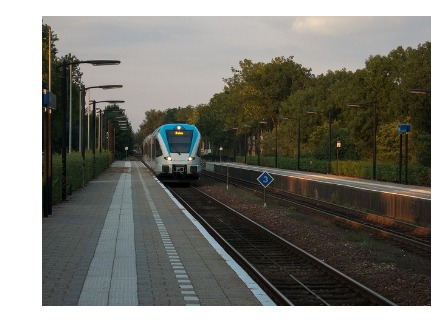

In [16]:
# demo how to use evalImgs to retrieve low score result
evals = [eva for eva in cocoEval.evalImgs if eva['CIDEr']<30]
print 'ground truth captions'
imgId = evals[0]['image_id']
annIds = coco.getAnnIds(imgIds=imgId)
anns = coco.loadAnns(annIds)
coco.showAnns(anns)

print '\n'
print 'generated caption (CIDEr score %0.1f)'%(evals[0]['CIDEr'])
annIds = cocoRes.getAnnIds(imgIds=imgId)
anns = cocoRes.loadAnns(annIds)
coco.showAnns(anns)

img = coco.loadImgs(imgId)[0]
# I = io.imread('%s/images/%s/%s'%(dataDir,dataType,img['file_name']))
I = io.imread('/cis/phd/cxz2081/data/mscoco/captioning/%s/%s'%(dataType,img['file_name']))
plt.imshow(I)
plt.axis('off')
plt.show()

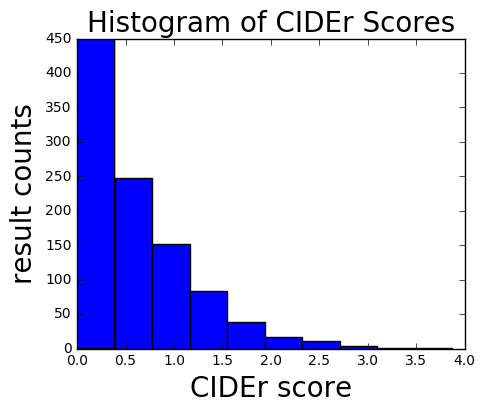

In [17]:
# plot score histogram
ciderScores = [eva['CIDEr'] for eva in cocoEval.evalImgs]
plt.hist(ciderScores)
plt.title('Histogram of CIDEr Scores', fontsize=20)
plt.xlabel('CIDEr score', fontsize=20)
plt.ylabel('result counts', fontsize=20)
plt.show()

In [18]:
# save evaluation results to ./results folder
json.dump(cocoEval.evalImgs, open(evalImgsFile, 'w'))
json.dump(cocoEval.eval,     open(evalFile, 'w'))